In [6]:
import matplotlib.pyplot as plt
import json
import numpy as np
import networkx as nx

json_neighborhood_file = open('my friend neighborhood_partial.json','r')
neighborhood_graph = json.load(json_neighborhood_file)

vertices = neighborhood_graph['vertices']
edges = neighborhood_graph['edges']
adjmat = np.array(neighborhood_graph['adjacency_matrix']) # edge(a,b) a is friends with b

node_size_scalar = 50
node_sizes = []
node_labels = {}

print vertices[0]
N = len(vertices)
print N
print edges[0]

# CONSTRUCT THE netoworkx graph
DG = nx.DiGraph()
for v in vertices[1:]:
    DG.add_node(v['screen_name'])
    node_sizes.append(node_size_scalar)
    node_labels[v['screen_name']] = v['screen_name'] # this has to be a dictionary for networkx drawing
for e in edges:
    DG.add_edge(e['source'],e['target'],{"weight":e['weight']}) # optional third argument, weight

print node_sizes
print node_labels




{u'id': 816321694319181824L, u'screen_name': u'societyoftrees'}
252
{u'source': u'societyoftrees', u'target': u'databyler', u'weight': 1}
[50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 5

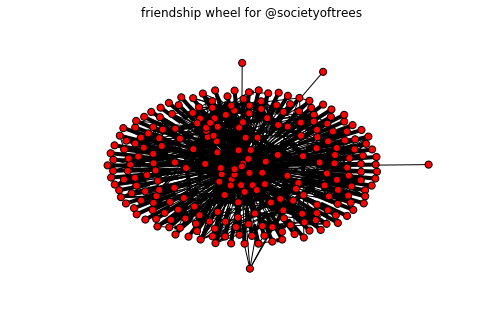

In [7]:
fig = plt.figure()
innerShellIDs = vertices[0]['screen_name']
middleShellIDs = []
for v in vertices[1:int(np.floor(N/2))]:
    middleShellIDs.append(v['screen_name'])
outerShellIDs = []
for v in vertices[int(np.floor(N/2)):]:
    outerShellIDs.append(v['screen_name']) # make a third shell to spread things out a little
#nx.draw_shell(DG,nlist = [[innerShellIDs], middleShellIDs, outerShellIDs], node_size=node_sizes,labels=node_labels, with_labels=True)
nx.draw_spring(DG,node_size=node_sizes)
#nx.draw_graphviz(DG)
plt.title('friendship wheel for @societyoftrees')
plt.show()



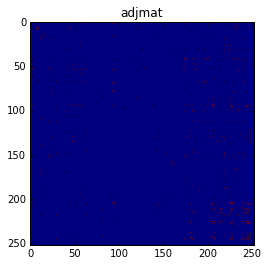

In [4]:
fig = plt.figure()
plt.imshow(adjmat)
plt.title('adjmat')
plt.show()